# HW5
Student name: PENG, Han
Student ID: 21035814

# Problem 1

In [61]:
import numpy as np
import random

def sparse_matrix(m, n, p):
    total_elements = m * n
    nonzero_entries = int(p * total_elements)

    A = np.zeros(total_elements)
    id = random.sample(range(total_elements),nonzero_entries)
    for i in range(len(id)):
        A[id[i]] = 1

    A = A.reshape(m,n)

    return A


In [192]:
# (a) 

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


# creat a matrix
def maxtrix_creation(r,p):
    m = 20
    n = 20

    # Construct a random rank-r matrix
    A = np.random.normal(size=(m,n))

    # Eigen decomposition of A
    # s is the eigen value matrix
    u, _, vh = np.linalg.svd(A, full_matrices=1, compute_uv=1)

    L = 0
    for i in range(r):
        ui = u[:,i].reshape(-1,1)
        vi = vh[i,:].reshape(1,-1)
        L = L + ui @ vi
    L_true = L
    E_true = sparse_matrix(m,n,p)
    M = L_true + E_true
 
    return L_true, E_true, M

def SDP(M,lam):
    m = 20
    n = 20
    L = cp.Variable((m, n))
    E = cp.Variable((m, n))
    W1 = cp.Variable((m, m))
    W2 = cp.Variable((n, n))
    objective = cp.Minimize(0.5*(cp.trace(W1)+cp.trace(W2)) + lam*cp.sum(cp.abs(E)))
    constraints = [L+E>=M-1e-5, L+E<=M+1e-5, cp.bmat([[W1, L],[L.T, W2]]) >> 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    return L.value, E.value, problem

r = 1
p = 0.1
lam = 0.2
L_true, E_true, M = maxtrix_creation(r,p)
#print(L_true)
#print(E_true)

L, E, problem = SDP(M,lam)
print(np.linalg.norm(E_true))
print(np.linalg.norm(E-E_true))
print(f"true number of nonzero element: {m*n*(1-p)}")
print(f"approximated number of nonzero element: {sum(abs(E.reshape(-1))<1e-4)}")

6.324555320336759
0.0005611718403676461
true number of nonzero element: 360.0
approximated number of nonzero element: 352


We can see that SPD can reconstruct sparse matrix E with high accuracy

iteration is 0
0.00031990021844053955
0.0003379676158885385
0.0009684162911986292
0.0002153581202312184
0.0001305754413549673
0.0006046942245408475
0.0004080706581717719
0.00013783838190057558
0.0005344792393546355
0.00012174433945529729
0.0006646327794419476
0.0037254409380226205
0.0006103759366641012
0.00017677957174322997
0.00022760547991333891
0.00046190329810285257
0.00046991105604147554
0.00021939233745037022
0.00023507715428043433
iteration is 1
0.00025475337932699086
0.0006359006623480462
0.00032730790738740305
0.0004719701206159901
0.0008657000551093638
0.00025560102851499396
0.00047510702534532697
0.0003675685447277063
0.00010997993193093586
0.0005592148447900416
0.00024847908644609493
0.0002857209034046768
0.0004640137418623921
iteration is 2
0.000573823257069307
0.00027550652334792025
0.005217379526491046
0.00016996114554018312
0.0021838247468442544
0.002531595588254833
0.005922313756825132
0.00043046774892252493
iteration is 3
0.0025076202096986043
0.0035972334819268014
0.

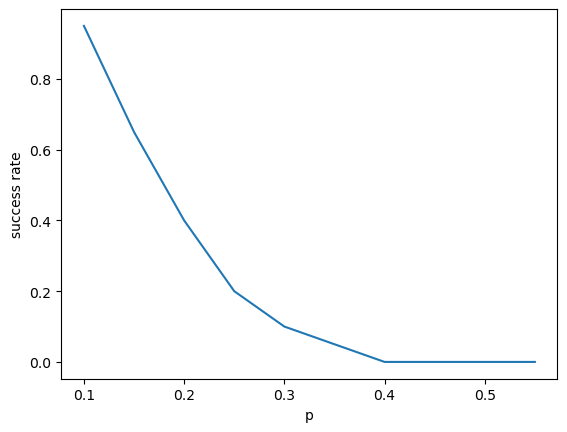

In [175]:
# (b) 

p = np.arange(0.1,0.6,0.05)
#p = np.array([0.2])
r = 1
trials = 20
lam = 0.2
success_rate = np.zeros(len(p))

for i, pi in enumerate(p):
    count = 0
    print(f"iteration is {i}")
    for j in range(trials): 
        L_true, E_true, M = maxtrix_creation(r,pi)
        L, E, problem = SDP(M,lam)
        if problem.status not in ["infeasible", "unbounded"]:
            if np.linalg.norm(E_true-E, ord=2) <= 1e-2:
                count = count+1
                print(np.linalg.norm(E-E_true))
    success_rate[i] = count/trials

plt.plot(p,success_rate)
plt.xlabel('p')
plt.ylabel('success rate')
plt.show()

As the percentage of non-zero elements goes up, the successful rate to reconstruct L is deceasing.
When p>=0.4, the method fails.

iteration is 0
0.00027884983408116103
0.0001065794650802693
0.000783655294613297
0.0001553333317823029
0.0004625188656318867
0.00016633892031429087
0.0004588698611334653
0.0003092281913737217
0.0003747047512976866
0.0004156844727266623
0.0003133330471101786
0.0006417772198181188
0.00038632013908960106
0.00013112661092173092
0.0002509049973651516
iteration is 1
0.0014473046293367491
0.0005593331248578997
0.0018344733635557908
0.00641316937395368
iteration is 2
0.0007652657710971313
iteration is 3
iteration is 4
iteration is 5
iteration is 6
iteration is 7
iteration is 8
iteration is 9
iteration is 10


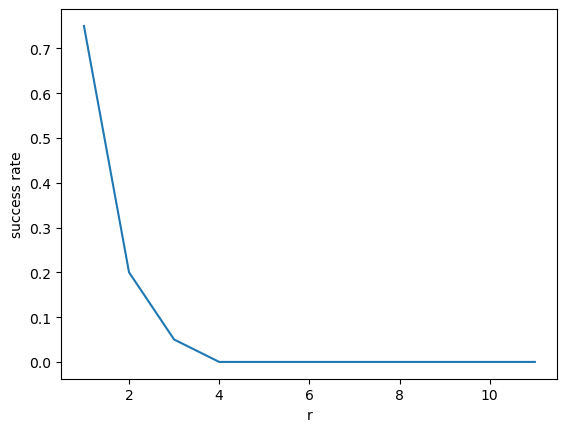

In [193]:
# (b) 

#p = np.arange(0.1,0.6,0.05)
#p = np.array([0.2])
p = 0.1
r = np.arange(1,12,1)
trials = 20
lam = 0.2
success_rate = np.zeros(len(r))

for i, ri in enumerate(r):
    count = 0
    print(f"iteration is {i}")
    for j in range(trials): 
        L_true, E_true, M = maxtrix_creation(ri,p)
        L, E, problem = SDP(M,lam)
        if problem.status not in ["infeasible", "unbounded"]:
            if np.linalg.norm(E_true-E, ord=2) <= 1e-2:
                count = count+1
                print(np.linalg.norm(E-E_true))
    success_rate[i] = count/trials

plt.plot(r,success_rate)
plt.xlabel('r')
plt.ylabel('success rate')
plt.show()

We can see that when r is small, i.e., the rank of L is small, Robust PCA has a high chance of recovering the data matrix.
However, as r goes up, i.e., the rank of L increases, it becomes hard for the algorithm to succeed.

# Problem 2

In [197]:
# (a)

import numpy as np
# construct data
n  = 2000
X = np.zeros((n, 10))


for i in range(n):
    v1 = np.random.normal(0,np.sqrt(290))
    v2 = np.random.normal(0,np.sqrt(300))
    v3 = -0.3*v1 + 0.925*v2 + np.random.normal(0,1)
    for j in range(4):
        X[i, j] = v1 + np.random.normal(0,1)
    
    for j in range(4, 8):  
        X[i, j] = v2 + np.random.normal(0,1)

    for j in range(8, 10):  
        X[i, j] = v3 + np.random.normal(0,1)


def covmat(X,n):
    X_cov = 0
    mu = np.mean(X,axis=0).reshape(1,-1)
    for i in range(n):
        xi = X[i,:].reshape(1,-1)
        X_cov = X_cov + (xi-mu).T*(xi-mu)
    X_cov = X_cov/n
    return X_cov

X_cov = covmat(X,n)
print(X_cov)

#X_cov = np.cov(X.transpose())
#print(X_cov)

[[ 309.81016712  308.97233086  309.76947185  309.10170554  -16.2405169
   -16.14204314  -16.57440714  -17.05602138 -107.60444611 -108.06443824]
 [ 308.97233086  310.1922571   309.96720338  309.34844284  -15.3754503
   -15.24360153  -15.64213546  -16.18808446 -106.88755616 -107.29741232]
 [ 309.76947185  309.96720338  311.74291703  310.13886368  -15.9506543
   -15.85807657  -16.20154061  -16.74826315 -107.6206473  -108.06319235]
 [ 309.10170554  309.34844284  310.13886368  310.51749588  -15.63540911
   -15.44869806  -15.91483806  -16.35629606 -107.19695491 -107.61696066]
 [ -16.2405169   -15.3754503   -15.9506543   -15.63540911  298.52642068
   297.54142445  297.2726166   296.81573646  278.23617139  278.74577326]
 [ -16.14204314  -15.24360153  -15.85807657  -15.44869806  297.54142445
   298.50636242  297.33776674  296.80865449  278.12362385  278.64756826]
 [ -16.57440714  -15.64213546  -16.20154061  -15.91483806  297.2726166
   297.33776674  298.10321145  296.55971313  278.03100199  278

In [185]:
# (b)

u, s, vh = np.linalg.svd(X_cov)
u_pca = u[:,:4]
print(u.shape)
print(u_pca)

(10, 10)
[[-0.13100857 -0.47478872  0.08701341  0.58014021]
 [-0.12989503 -0.47498019  0.10356262  0.10129882]
 [-0.13038828 -0.47481542  0.05283632 -0.32965669]
 [-0.13084638 -0.47442885  0.10384003 -0.34709168]
 [ 0.38983272 -0.15729337 -0.23232133 -0.38627372]
 [ 0.39034254 -0.15606268 -0.28530351 -0.00798335]
 [ 0.39022629 -0.1575399  -0.28086548  0.48102792]
 [ 0.39012218 -0.1564964  -0.2815301  -0.1030544 ]
 [ 0.40178738 -0.00357314  0.56681894  0.13635655]
 [ 0.40199544 -0.00419421  0.59441517 -0.11898494]]


In [198]:
# (c)

def SPCA(X_cov):
    lam = 5
    e=np.ones((10,1))
    us = cp.Variable((10, 10), symmetric=True)
    objective = cp.Maximize(cp.trace(X_cov@us) - lam*(e.T@cp.abs(us)*e))
    constraints = [cp.trace(us) == 1, us >> 0]
    problem = cp.Problem(objective, constraints)
    problem.solve(solver='SCS')
    return us.value
#print(us.value)

us = SPCA(X_cov)
us1 = us[:,0].reshape(-1,1)
u_sparse = us[:,0:4]
print(u_sparse)
#print(us1)



# compare error
x1 = X[0,:].T
print(X)
print(x1)

e = np.linalg.norm(x1-u_sparse@u_sparse.T@x1)
print(e)

e = np.linalg.norm(x1-u_pca@u_pca.T@x1)
print(e)


[[ 0.03144983  0.03127235  0.03147381  0.03134232]
 [ 0.03127235  0.03109583  0.03129618  0.03116542]
 [ 0.03147381  0.03129618  0.03149777  0.0313662 ]
 [ 0.03134232  0.03116542  0.0313662   0.03123513]
 [-0.06619312 -0.06581953 -0.06624355 -0.06596679]
 [-0.06617712 -0.06580362 -0.06622754 -0.06595084]
 [-0.06616253 -0.06578911 -0.06621294 -0.0659363 ]
 [-0.06609696 -0.06572391 -0.06614732 -0.06587096]
 [-0.07064258 -0.07024388 -0.0706964  -0.07040103]
 [-0.07079725 -0.07039768 -0.07085119 -0.07055518]]
[[ 11.74581195  13.41794077  13.21783425 ... -19.35362888 -21.02491749
  -23.05861537]
 [ -5.30694462  -5.96145709  -6.55606761 ...  16.82365535  18.02224005
   18.49100055]
 [  7.30668303   7.79599955   7.38697589 ... -12.23172244 -13.60766326
  -11.76813202]
 ...
 [ 20.44605507  19.78693434  18.39466804 ...  30.76495552  21.54018857
   21.63068454]
 [  3.80063984   4.12594173   4.36027005 ...  -9.66813651 -11.87025782
  -11.35291883]
 [-40.2935533  -37.54928521 -36.96003349 ...  -8.

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 21 times so far.

  warnings.warn(msg, UserWarning)


We take the first row of X and compute the residual norm using PCA project and sparse PCA project.

We find that the two methods give close results

In [199]:
# (d)
X_r1 = np.copy(X)
for i in range(n):
    X_r1[i,:] = X[i,:]-us1@us1.T@X[i,:]
X_cov_r1 = covmat(X_r1,n)
us = SPCA(X_cov_r1)
us2 = us[:,0].reshape(-1,1)
print(us2)

print(X_cov_r1)

[[ 0.03129261]
 [ 0.03111532]
 [ 0.03131635]
 [ 0.03118516]
 [-0.06605692]
 [-0.06604097]
 [-0.0660263 ]
 [-0.06596071]
 [-0.0704805 ]
 [-0.07063489]]
[[ 306.18947767  305.37160322  306.14608629  305.49310912   -8.71232701
    -8.61565271   -9.04965761   -9.53864627  -99.57583507 -100.01843131]
 [ 305.37160322  306.61138128  306.3637945   305.75974161   -7.88875331
    -7.75869408   -8.15885987   -8.71214266  -98.90319542  -99.29575157]
 [ 306.14608629  306.3637945   308.11683336  306.52758016   -8.41686029
    -8.32608336   -8.67118953   -9.22529198  -99.58605972 -100.01119594]
 [ 305.49310912  305.75974161  306.52758016  306.92095214   -8.13235599
    -7.94743838   -8.41521382   -8.86402162  -99.19515109  -99.59781904]
 [  -8.71232701   -7.88875331   -8.41686029   -8.13235599  282.8760549
   281.89479904  281.629402    281.18785042  261.54562437  262.01906697]
 [  -8.61565271   -7.75869408   -8.32608336   -7.94743838  281.89479904
   282.8634765   281.69829081  281.18450345  261.4370

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 22 times so far.

  warnings.warn(msg, UserWarning)


In [196]:
# (d)
X_r2 = np.copy(X)
for i in range(n):
    X_r2[i,:] = X_r1[i,:]-us2@us2.T@X_r1[i,:]
X_cov_r2 = covmat(X_r2,n)
us = SPCA(X_cov_r2)
us3 = us[:,0].reshape(-1,1)
print(us3)

X_r3 = np.copy(X)
for i in range(n):
    X_r3[i,:] = X_r2[i,:]-us3@us3.T@X_r2[i,:]
X_cov_r3 = covmat(X_r3,n)
us = SPCA(X_cov_r3)
us4 = us[:,0].reshape(-1,1)
print(us4)

X_r4 = np.copy(X)
for i in range(n):
    X_r4[i,:] = X_r3[i,:]-us4@us4.T@X_r3[i,:]
X_cov_r4 = covmat(X_r4,n)
us = SPCA(X_cov_r4)
us5 = us[:,0].reshape(-1,1)
print(X_cov_r4)


[[ 0.00424756]
 [ 0.00421703]
 [ 0.00429854]
 [ 0.00423381]
 [-0.02661247]
 [-0.02657067]
 [-0.02663187]
 [-0.026533  ]
 [-0.02592399]
 [-0.02599543]]
[[ 0.00423628]
 [ 0.00420579]
 [ 0.0042872 ]
 [ 0.00422255]
 [-0.02657815]
 [-0.0265364 ]
 [-0.02659754]
 [-0.02649877]
 [-0.02588932]
 [-0.02596066]]
[[290.54468247 288.81058126 288.50520828 288.98479819   9.27392196
    8.84384689   9.32483569   8.70165842 -77.82465409 -78.50526863]
 [288.81058126 289.06665362 287.77389263 288.27289874   9.46242929
    9.01575205   9.50428592   8.92398884 -77.49861342 -78.11300684]
 [288.50520828 287.77389263 288.53384849 287.96385599   8.52293958
    8.112933     8.57719488   7.93086219 -78.27437599 -78.94985272]
 [288.98479819 288.27289874 287.96385599 289.438335     9.37765737
    8.90930136   9.4029862    8.75727863 -77.73401539 -78.37399533]
 [  9.27392196   9.46242929   8.52293958   9.37765737 298.82214891
  297.32952324 298.11138383 296.87852368 271.52539994 272.21723381]
 [  8.84384689   9.0157

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 18 times so far.

  warnings.warn(msg, UserWarning)
c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 19 times so far.

  warnings.warn(msg, UserWarni